In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
import kaggle
!chmod 600 kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d dsalegngeb/students-exam-scores

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('students-exam-scores.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = pd.read_csv("Expanded_data_with_more_features.csv")
df = df1.copy()
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [12]:
# drop unnamed col because it is index col
df = df.drop("Unnamed: 0", axis =1)

#Gender Distribution

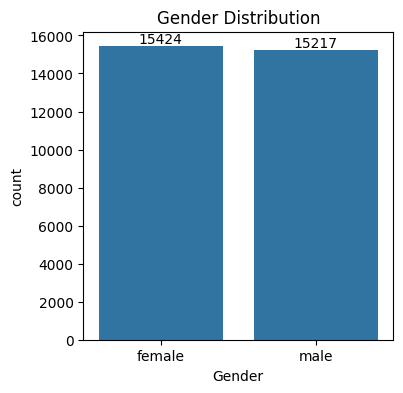

In [49]:
plt.figure(figsize=(4,4))
plt.title('Gender Distribution')
ax = sns.countplot(data = df,x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# Number of Females Students is more than the no. of male

#Impact Of Parents Education on student performance

In [ ]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


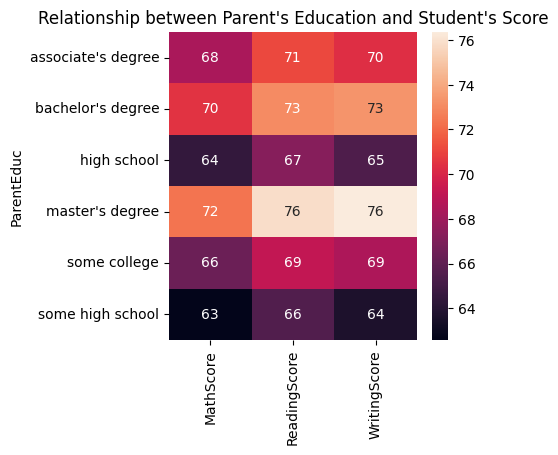

In [ ]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Parent's Education and Student's Score")

sns.heatmap(gb, annot = True)
plt.show()

In [ ]:
# From the above chart we have concluded that the education of the parents ,Have significant impact the mark of the students

#Impact Of Parents Marital Status on student performance

In [24]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


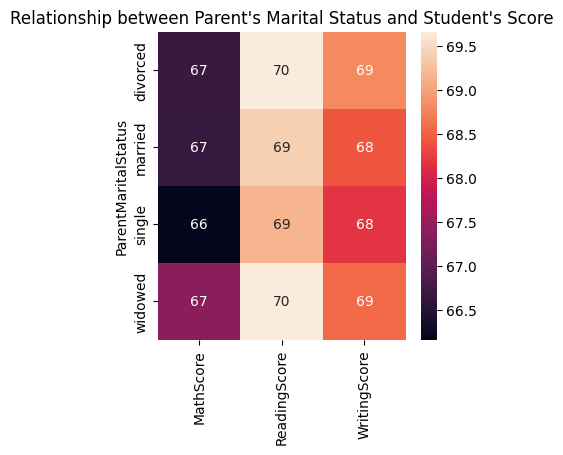

In [25]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Parent's Marital Status and Student's Score")
sns.heatmap(gb1, annot = True)
plt.show()

In [ ]:
# From the above chart we have concluded that there is no or negligible impacts on the mark of the students due to their Parent
# Marital Status of parents

#Relationship between PracticeSport and student performance

In [27]:
gb2 = df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


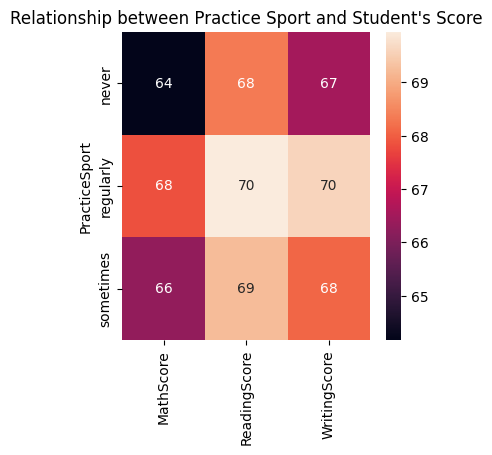

In [29]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Practice Sport and Student's Score")
sns.heatmap(gb2, annot = True)
plt.show()

In [ ]:
# Student Who practice regulary are performing slightly better than other.

#Impact of test on student Score

In [50]:
gb3 = df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


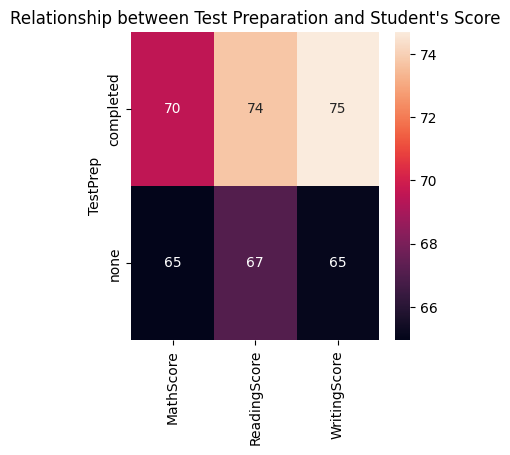

In [51]:
plt.figure(figsize=(4,4))
plt.title("Relationship between Test Preparation and Student's Score")
sns.heatmap(gb3, annot = True)
plt.show()

In [ ]:
# Students who completed test preparation are score good compare to those who don't.

# Impact due to no. of siblings on student performance

In [45]:
gb4 = df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


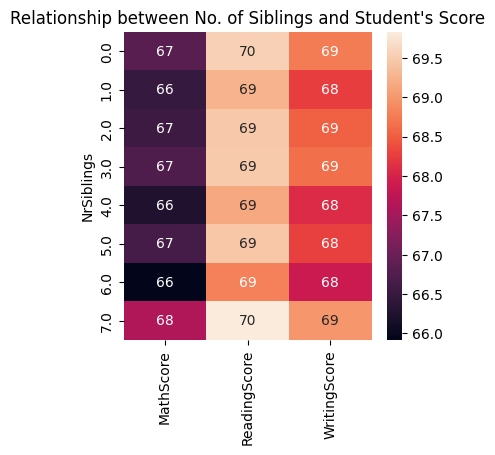

In [52]:
plt.figure(figsize=(4,4))
plt.title("Relationship between No. of Siblings and Student's Score")

sns.heatmap(gb4, annot = True)
plt.show()

In [ ]:
# No of sibling don't impact the score of student

#Marks Range

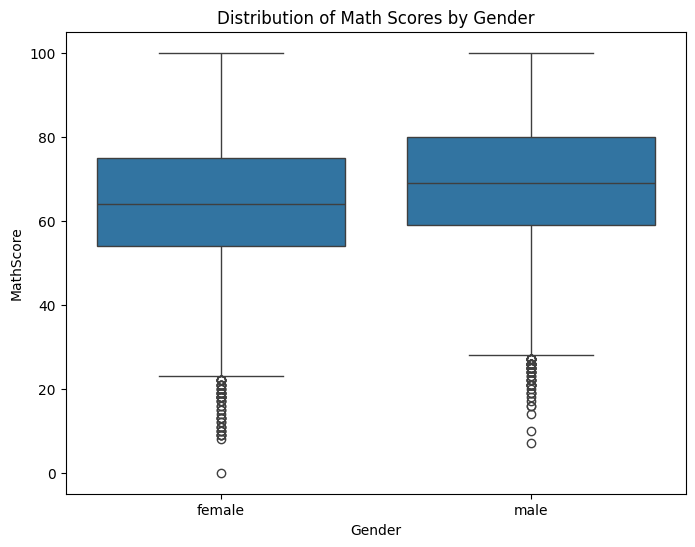

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="MathScore", data=df)
plt.title("Distribution of Math Scores by Gender")
plt.show()

In [ ]:
#  the score across genders is balanced.

In [38]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


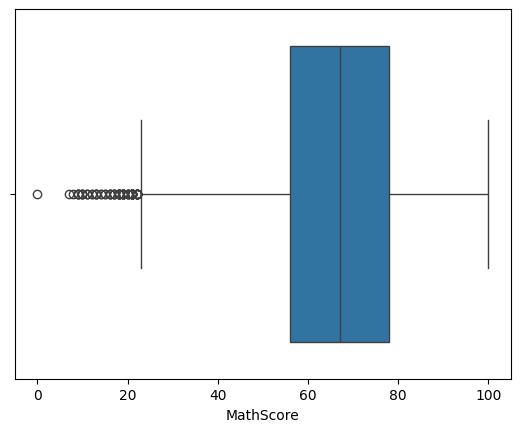

In [35]:
sns.boxplot(data = df,x= "MathScore")
plt.show()

In [ ]:
#The box plot reveals that while most students score between 56 and 78 in maths

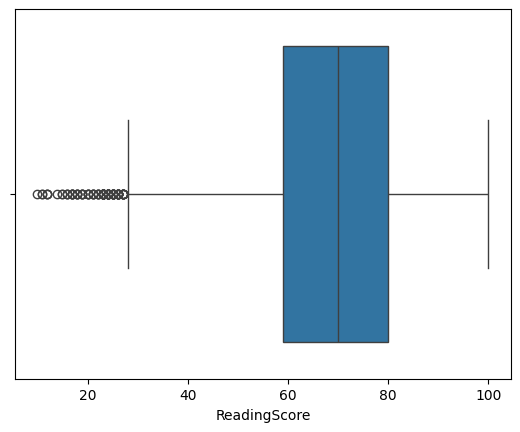

In [ ]:
sns.boxplot(data = df,x= "ReadingScore")
plt.show()

In [ ]:
#The box plot reveals that while most students score between 59 and 80

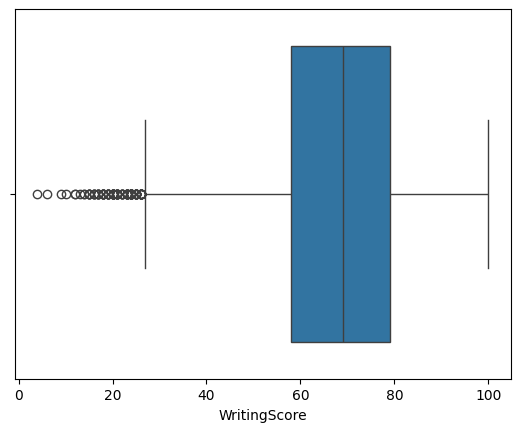

In [ ]:
sns.boxplot(data = df,x= "WritingScore")
plt.show()

In [37]:
#The box plot reveals that while most students score between 58 and 79

#Distribution of Ethnic Groups

In [ ]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


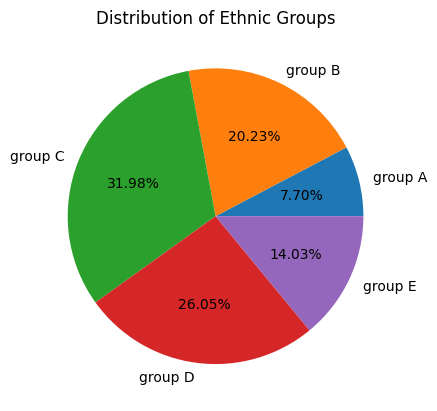

In [54]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

# print(groupA)
l =["group A","group B","group C","group D","group E"]
mlist =[groupA["EthnicGroup"],
        groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels =l, autopct ="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

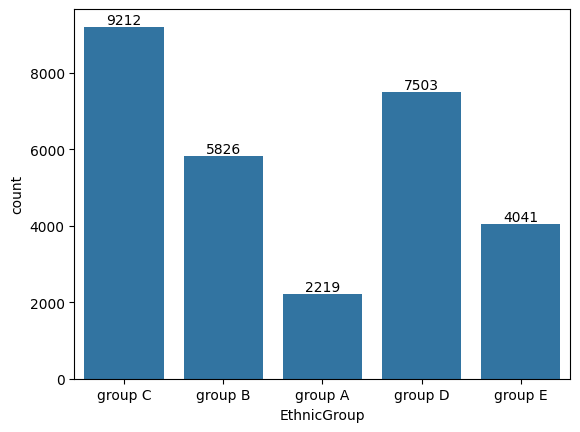

In [55]:
ax = sns.countplot(data =df, x ='EthnicGroup')
ax.bar_label(ax.containers[0])

In [57]:
import pandas as pd

# Count the number of occurrences for each ethnic group
group_counts = df['EthnicGroup'].value_counts()

# Calculate the percentage of each group
total_count = group_counts.sum()
group_percentages = (group_counts / total_count) * 100

# Create a DataFrame to display the counts and percentages in a table
ethnic_group_table = pd.DataFrame({
    'Ethnic Group': group_counts.index,
    'Count': group_counts.values,
    'Percentage (%)': group_percentages.values
})

# Display the table
print(ethnic_group_table)


  Ethnic Group  Count  Percentage (%)
0      group C   9212       31.985001
1      group D   7503       26.051179
2      group B   5826       20.228464
3      group E   4041       14.030763
4      group A   2219        7.704594
